In [1]:
import pandas as pd
import scipy.stats as stats
from datetime import datetime
import os

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from utils.graph_layout import font_layout
from utils.stats import calculate_quartiles_and_iqr, remove_outliers_iqr, t_test

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")

C:\Users\victo\AppData\Local\Temp\ipykernel_22004\1401744279.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Funções

In [2]:
def show_value_counts(df, columns):
    print(((df[columns].value_counts(normalize=True) * 100).__round__(2)))
    return None

# Carregando Dados

In [3]:
import pandas as pd
import os
from pathlib import Path

# Obtém o diretório atual de trabalho
CURRENT_DIR = Path(os.getcwd())

# combina o diretório atual com os diretórios "data" e "raw" usando o operador "/"
# para criar um caminho absoluto para o diretório de dados brutos
RAW_DATA_DIR = CURRENT_DIR.parent / 'data' / 'raw'

# combinando o caminho RAW_DATA_DIR com o nome do arquivo Excel
excel_file_path = RAW_DATA_DIR / 'airbnb_data.xlsx'

# lendo o arquivo Excel usando o caminho completo
df = pd.read_excel(excel_file_path)

In [4]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7146 entries, 0 to 7145
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_is_superhost               7146 non-null   object 
 1   cancellation_policy             7146 non-null   object 
 2   instant_bookable                7146 non-null   object 
 3   host_total_listings_count       7146 non-null   float64
 4   neighbourhood_cleansed          7146 non-null   object 
 5   latitude                        7146 non-null   float64
 6   longitude                       7146 non-null   float64
 7   property_type                   7146 non-null   object 
 8   room_type                       7146 non-null   object 
 9   accommodates                    7146 non-null   float64
 10  bathrooms                       7146 non-null   object 
 11  bedrooms                        7146 non-null   float64
 12  beds                            71

,host_is_superhost,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,bedrooms_na,bathrooms_na,beds_na,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
0,t,moderate,t,1.0,Western Addition,3776931.0,-12243386.0,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,1.0,180.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,f,strict_14_with_grace_period,f,2.0,Bernal Heights,3774511.0,-12242102.0,Apartment,Entire home/apt,5.0,1.0,2.0,3.0,Real Bed,30.0,111.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,235.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,f,strict_14_with_grace_period,f,10.0,Haight Ashbury,3776669.0,-1224525.0,Apartment,Private room,2.0,4.0,1.0,1.0,Real Bed,32.0,17.0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f,strict_14_with_grace_period,f,10.0,Haight Ashbury,3776487.0,-12245183.0,Apartment,Private room,2.0,4.0,1.0,1.0,Real Bed,32.0,8.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,f,strict_14_with_grace_period,f,2.0,Western Addition,3777525.0,-12243637.0,House,Entire home/apt,5.0,2022-05-01 00:00:00,2.0,2.0,Real Bed,7.0,27.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,785.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Preparação dos Dados

## Verificando nulos e duplicatas

In [5]:
df.isna().sum()

host_is_superhost                 0
cancellation_policy               0
instant_bookable                  0
host_total_listings_count         0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
minimum_nights                    0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
price                             0
bedrooms_na                       0
bathrooms_na                      0
beds_na                           0
review_scores_rating_na     

In [6]:
df.duplicated().sum()

0

## Transformando valores

In [7]:
cols_to_numeric = ['host_is_superhost', 'instant_bookable']

# Itera sobre as colunas que desejamos transformar em valores numéricos
for col_ in cols_to_numeric:
    print(f'Transformando valores da coluna {col_}')
    
    # Substitui 't' (verdadeiro) por 1
    df.loc[df[col_] == 't', col_] = 1
    
    # Substitui 'f' (falso) por 0
    df.loc[df[col_] == 'f', col_] = 0
    
    # Converte a coluna para o tipo de dados inteiro (int)
    df[col_] = df[col_].astype(int)

Transformando valores da coluna host_is_superhost
Transformando valores da coluna instant_bookable


In [8]:
df.select_dtypes(object)

,cancellation_policy,neighbourhood_cleansed,property_type,room_type,bathrooms,bed_type
0,moderate,Western Addition,Apartment,Entire home/apt,1.0,Real Bed
1,strict_14_with_grace_period,Bernal Heights,Apartment,Entire home/apt,1.0,Real Bed
2,strict_14_with_grace_period,Haight Ashbury,Apartment,Private room,4.0,Real Bed
3,strict_14_with_grace_period,Haight Ashbury,Apartment,Private room,4.0,Real Bed
4,strict_14_with_grace_period,Western Addition,House,Entire home/apt,2022-05-01 00:00:00,Real Bed
...,...,...,...,...,...,...
7141,flexible,Noe Valley,House,Entire home/apt,1.0,Real Bed
7142,flexible,Russian Hill,Guest suite,Entire home/apt,1.0,Real Bed
7143,flexible,Western Addition,Apartment,Entire home/apt,1.0,Real Bed
7144,flexible,Downtown/Civic Center,Apartment,Entire home/apt,1.0,Real Bed


In [9]:
# listando coluas categóricas
categorical_columns = [
    'host_is_superhost'
    , 'cancellation_policy'
    , 'instant_bookable'
    , 'neighbourhood_cleansed'
    , 'property_type'
    , 'room_type'
    , 'bathrooms'
    , 'bedrooms'
    , 'bed_type'
    ]

In [10]:
# analisando a distribuição dos dados
for col_ in categorical_columns:
    show_value_counts(df, col_)
    print('-'*100)

host_is_superhost
0    58.98
1    41.02
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
cancellation_policy
strict_14_with_grace_period    43.18
moderate                       35.24
flexible                       19.93
super_strict_30                 0.92
strict                          0.60
super_strict_60                 0.13
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
instant_bookable
0    61.99
1    38.01
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
neighbourhood_cleansed
Mission                  9.67
Western Addition         8.38
South of Market          8.38
Downtown/Civic Center    7.53
Castro/Upper Market      5.67
Bernal Heights           5.22
Haight Ashbury           4.91
Noe Valley               4.44
Outer Sunset  

## Análise Exploratória
Como queremos avaliar sobre receita e taxa de ocupação, inicialmente faremos uma avaliação do conteúdo da coluna "price"

### Price

In [11]:
# descrição da variável preço
df['price'].describe().to_frame()

,price
count,7146.000000
mean,213.309824
std,311.375499
min,10.000000
25%,100.000000
50%,150.000000
75%,235.000000
max,10000.000000


In [12]:
px.histogram(df, x='price', marginal='box')

O valor máximo pode estar muito alto. É melhor identificar outliers avaliando os quartis dessa coluna.

In [13]:
df_processed = remove_outliers_iqr(df, 'price')

Primeiro Quartil (Q1): 100.0
Terceiro Quartil (Q3): 235.0
Amplitude Interquartil (IQR): 135.0
Limite inferior: -102.5
Limite superior: 437.5


In [14]:
px.histogram(df_processed, x='price', marginal='box')

In [15]:
rows_diff = df.shape[0] - df_processed.shape[0]
print(f'Linhas do dataframe original: {df.shape[0]}')
print(f'Diferença de linhas entre o dataset pré e pós eliminar outliers: {rows_diff}')
print(f'Percentual de dados eliminados: {(100 * rows_diff / df.shape[0]).__round__(2)}%')

Linhas do dataframe original: 7146
Diferença de linhas entre o dataset pré e pós eliminar outliers: 568
Percentual de dados eliminados: 7.95%


Tratando-se de possíveis campanhas de marketing e retenção, irei optar por eliminar os outliers e utilizar a maior proporção de clientes da base.

In [16]:
df = df_processed.copy()

<AxesSubplot: >

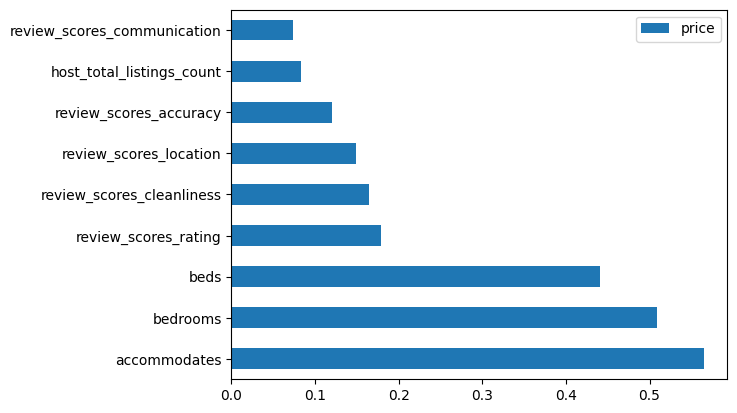

In [17]:
# top 10 variáveis linearmente correlatas até o momento

# Seleciona apenas colunas numéricas (int e float) do DataFrame df_processed
# Calcula a matriz de correlação em relação à coluna 'price'
# Converte os resultados em um DataFrame
# Classifica os valores em ordem decrescente com base na coluna 'price'
# Seleciona as 10 principais variáveis (excluindo 'price')
# Plota um gráfico de barras horizontais para visualizar as correlações
(
    df_processed.select_dtypes([int, float])  # selecionando colunas numéricas
    .corr()['price']  # calculando a correlação com 'price'
    .to_frame()  # convertendo os resultados em um DataFrame
    .sort_values('price', ascending=False)[:10]  # classificando em ordem decrescente
    .drop('price')  # removendo a coluna 'price'
).plot(kind='barh')  # plotando o gráfico de barras horizontais


### Bathrooms

A coluna bathrooms contém valores que precisam de tratamento

In [18]:
# definindo uma função chamada "is_date" para verificar se um valor é do tipo datetime
def is_date(valor):
    return isinstance(valor, datetime)

# .loc para filtrar as linhas que contêm datas na coluna "bathrooms"
indice_banheiros_datetime = df.loc[df['bathrooms'].apply(is_date)].index

# substitui os valores de data na coluna "bathrooms" por 0
# como não temos informações e quero preservar o tipo da variável, vamos considera-lo com 0 = sem informação
df.loc[indice_banheiros_datetime, 'bathrooms'] = 0
# Converte a coluna "bathrooms" para o tipo de dados float e, em seguida, para int
df['bathrooms'] = df['bathrooms'].astype(float).astype(int)

In [19]:
df['bathrooms'].value_counts()

bathrooms
1     4999
2      802
0      612
3       87
5       24
4       22
8       15
10      10
6        6
14       1
Name: count, dtype: int64

## Acomodações

    Total de pessoas que serão acomodadas

In [20]:
(df['accommodates'].value_counts(normalize=True) * 100).__round__(1)

accommodates
2.0     48.1
4.0     20.5
1.0      9.5
3.0      8.6
6.0      6.2
5.0      4.2
8.0      1.2
7.0      1.1
10.0     0.2
9.0      0.2
12.0     0.1
15.0     0.0
11.0     0.0
14.0     0.0
13.0     0.0
Name: proportion, dtype: float64

In [21]:
# calculando quartis e IQR para a coluna 'accommodates'
calculate_quartiles_and_iqr(df.accommodates)

Primeiro Quartil (Q1): 2.0
Terceiro Quartil (Q3): 4.0
Amplitude Interquartil (IQR): 2.0
Limite inferior: -1.0
Limite superior: 7.0


(2.0, 4.0, 2.0, -1.0, 7.0)

In [22]:
# Substitui valores maiores ou iguais a 7 na coluna 'accommodates' por '7+'
df.loc[df['accommodates'] >= 7.0, 'accommodates'] = '7+'

# Converte a coluna 'accommodates' para o tipo de dados string (str)
df.accommodates = df.accommodates.astype(str)

C:\Users\victo\AppData\Local\Temp\ipykernel_22004\791572344.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7+' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [23]:
(df.accommodates.value_counts(normalize=True) * 100).__round__(1)

accommodates
2.0    48.1
4.0    20.5
1.0     9.5
3.0     8.6
6.0     6.2
5.0     4.2
7+      3.0
Name: proportion, dtype: float64

Considerando que 2 a 4 hóspedes podem representar ~68% das acomodações ocupadas, certas campanhas de marketing direcionadas a esse público podem ser interessantes.

In [24]:
# Agrupa o DataFrame df pela coluna 'accommodates' e calcula a mediana dos preços
# para cada grupo. Em seguida, converte os resultados em um novo DataFrame e
# redefine os índices.
group_acommodacoes_preco = (
    df.groupby('accommodates')['price']  # Agrupa por 'accommodates' e calcula a mediana de 'price'
    .median()  # Calcula a mediana dos preços para cada grupo
    .to_frame()  # Converte os resultados em um novo DataFrame
    .reset_index()  # Redefine os índices
)
group_acommodacoes_preco

,accommodates,price
0,1.0,79.0
1,2.0,125.0
2,3.0,145.0
3,4.0,195.0
4,5.0,215.0
5,6.0,250.0
6,7+,295.0


In [25]:
import plotly.express as px

fig = px.bar(
    group_acommodacoes_preco,  # Seu DataFrame ou dados
    y='accommodates',  # Eixo x
    x='price',  # Eixo y
    title='Preço Médio por Capacidade de Acomodação',
    labels={'accommodates': 'Capacidade de Acomodação', 'price': 'Preço Médio'},
    # template='plotly_dark',  # Escolha um modelo de fundo
    color_discrete_sequence=['blue'],  # Escolha a cor das barras
    height=400,  # Altura do gráfico
    width=700,  # Largura do gráfico
    text_auto=True
)

fig.update_layout(
            **font_layout()
            , width=900, height=550
            , title='Valor Mediano por Quantidade de Pessoas Acomodadas'
            , xaxis_title='Valor Mediano da Hospedagem'
            , yaxis_title='Quantidade de Acomodações'
        )

fig.show()


Levando em conta que 'bedrooms' também foi uma variável linearmente correlata. Sabemos que quanto maior a quantidade de quartos, maior tende a ser o preço. \
Entretanto, quantos quartos poderiam atender essa densidade de pessoas entre 2 a 4 hóspedes?

In [26]:
df[(df['accommodates'] >='2') & (df['accommodates'] <'5')].accommodates.unique()

array(['3.0', '2.0', '4.0'], dtype=object)

In [27]:
# filtrando accommodates entre 2 e 4
acomodacoes234 = df.loc[(df['accommodates'] >='2') & (df['accommodates'] <'5')]
acomodacoes234.bedrooms.value_counts(normalize=True) * 100

bedrooms
1.0    68.201495
2.0    16.155057
0.0    14.698937
3.0     0.944510
Name: proportion, dtype: float64

In [28]:
# analisando o mínimo de noites no local para 2 a 4 hóspedes
(acomodacoes234.minimum_nights.value_counts(normalize=True) * 100).__round__(1)

minimum_nights
30.0     40.1
2.0      20.8
1.0      19.4
3.0      10.2
4.0       2.9
5.0       1.8
31.0      1.5
7.0       0.7
180.0     0.4
60.0      0.4
6.0       0.3
90.0      0.3
32.0      0.3
365.0     0.1
14.0      0.1
45.0      0.1
40.0      0.1
120.0     0.0
10.0      0.0
50.0      0.0
28.0      0.0
9.0       0.0
100.0     0.0
270.0     0.0
188.0     0.0
80.0      0.0
85.0      0.0
58.0      0.0
18.0      0.0
70.0      0.0
25.0      0.0
75.0      0.0
17.0      0.0
170.0     0.0
360.0     0.0
29.0      0.0
200.0     0.0
183.0     0.0
21.0      0.0
Name: proportion, dtype: float64

In [29]:
# analisando o mínimo de noites no local da base total
(df.minimum_nights.value_counts(normalize=True) * 100).__round__(1)

minimum_nights
30.0     40.7
2.0      19.9
1.0      17.9
3.0      10.6
4.0       3.1
5.0       2.1
31.0      1.9
7.0       0.8
32.0      0.5
60.0      0.4
6.0       0.4
180.0     0.4
90.0      0.4
45.0      0.1
120.0     0.1
365.0     0.1
14.0      0.1
10.0      0.0
40.0      0.0
80.0      0.0
28.0      0.0
183.0     0.0
50.0      0.0
100.0     0.0
18.0      0.0
9.0       0.0
270.0     0.0
35.0      0.0
21.0      0.0
188.0     0.0
85.0      0.0
58.0      0.0
70.0      0.0
13.0      0.0
140.0     0.0
25.0      0.0
75.0      0.0
17.0      0.0
170.0     0.0
59.0      0.0
360.0     0.0
29.0      0.0
200.0     0.0
24.0      0.0
Name: proportion, dtype: float64

In [30]:
# avaliando a distribuição por quantidade de camas
(acomodacoes234.beds.value_counts(normalize=True) * 100).__round__(1)

beds
1.0    63.2
2.0    30.2
3.0     3.7
4.0     1.5
0.0     1.3
5.0     0.1
Name: proportion, dtype: float64

In [31]:
# avaliando a distribuição por tipo de cama
(acomodacoes234.bed_type.value_counts(normalize=True) * 100).__round__(1)

bed_type
Real Bed         99.1
Futon             0.4
Pull-out Sofa     0.3
Couch             0.1
Airbed            0.1
Name: proportion, dtype: float64

84% dos hospedes nos grupos de 2 a 4 reservam acomodações com 2 quartos. A maioria das acomodações, tanto na base segmentada, quanto na base total, são de pessoas que optam por cama "real bed".

## Política de Cancelamento

Entendendo as variáveis segundo o tipo de negócio:

1. **Moderate (Moderada)**:
   - Os hóspedes podem cancelar e receber um reembolso total até 5 dias antes do check-in.
   - Se o cancelamento for feito dentro de 5 dias antes do check-in, o hóspede será reembolsado apenas pelas noites não utilizadas.
   
2. **Strict 14 with Grace Period (Rígida 14 com Período de Carência)**:
   - Os hóspedes podem cancelar e receber um reembolso total até 14 dias antes do check-in.
   - Se o cancelamento for feito dentro de 14 dias antes do check-in, o hóspede será reembolsado apenas pelas noites não utilizadas.
   - Existe um período de carência de 48 horas após a reserva, durante o qual os hóspedes podem cancelar e receber um reembolso total, independentemente da data de check-in.

3. **Flexible (Flexível)**:
   - Os hóspedes podem cancelar e receber um reembolso total até 24h antes do check-in.
   - Se o cancelamento for feito dentro de 1 dia antes do check-in, o hóspede será reembolsado apenas pelas noites não utilizadas.

4. **Super Strict 30 (Super Rígida 30)**:
   - Esta é uma política de cancelamento mais restrita e geralmente é aplicada a propriedades de alto valor.
   - Os hóspedes podem cancelar e receber um reembolso total até 30 dias antes do check-in.
   - Se o cancelamento for feito dentro de 30 dias antes do check-in, o hóspede não receberá um reembolso, a menos que haja circunstâncias excepcionais.

5. **Strict (Rígida)**:
   - Os hóspedes podem cancelar e receber um reembolso total até 30 dias antes do check-in.
   - Se o cancelamento for feito dentro de 30 dias antes do check-in, o hóspede será reembolsado apenas pelas noites não utilizadas.

6. **Super Strict 60 (Super Rígida 60)**:
   - Esta é uma política de cancelamento ainda mais restrita, geralmente aplicada a propriedades de alto valor.
   - Os hóspedes podem cancelar e receber um reembolso total até 60 dias antes do check-in.
   - Se o cancelamento for feito dentro de 60 dias antes do check-in, o hóspede não receberá um reembolso, a menos que haja circunstâncias excepcionais.


In [32]:
(df['cancellation_policy'].value_counts(normalize=True) * 100).__round__(2)

cancellation_policy
strict_14_with_grace_period    41.84
moderate                       35.94
flexible                       20.51
super_strict_30                 1.00
strict                          0.65
super_strict_60                 0.06
Name: proportion, dtype: float64

In [33]:
group_cancellation_price = (
    df.groupby('cancellation_policy')['price']
    .median()
    .to_frame()
    .reset_index()
    )
group_cancellation_price = group_cancellation_price.replace(
    {
        'flexible': 'flexível'
        , 'moderate':'moderada'
        , 'strict': 'rígida'
        , 'strict_14_with_grace_period': 'rígida - cancelamento em 14 dias'
        , 'super_strict_30': 'super rígida - cancelamento em 30 dias'
        , 'super_strict_60': 'super rígida - cancelamento em 60 dias'
    }    
    )

In [34]:
fig = px.bar(
    group_cancellation_price,  # Seu DataFrame ou dados
    y='cancellation_policy',  # Eixo x
    x='price',  # Eixo y
    title='Preço Médio por Capacidade de Acomodação',
    labels={'cancellation_policy': 'Política de Cancelamento', 'price': 'Preço Mediano'},
    # template='plotly_dark',  # Escolha um modelo de fundo
    color_discrete_sequence=['blue'],  # Escolha a cor das barras
    height=400,  # Altura do gráfico
    width=700,  # Largura do gráfico
    text_auto=True
)

fig.update_layout(
            **font_layout()
            , width=900, height=550
            , title='Valor Mediano por Política de Cancelamento'
            , xaxis_title='Valor Mediano'
            , yaxis_title='Política de Cancelamento'
        )

fig.update_xaxes(title_font=dict(size=20))
fig.update_yaxes(title_font=dict(size=20))
fig.show()

**O tipo de política de cancelamento é significante quando olhamos para o total de reservas efetuadas?**

In [35]:
from scipy.stats import f_oneway

# Realize uma ANOVA para verificar a significância
cancellation_policies = df['cancellation_policy'].unique()
anova_results = {}

for policy in cancellation_policies:
    group = df[df['cancellation_policy'] == policy]['host_total_listings_count']
    anova_results[policy] = group

# Execute o teste ANOVA
f_statistic, p_value = f_oneway(*anova_results.values())

# Verifique o resultado
if p_value < 0.05:  # Define um nível de significância (0,05) para determinar a significância estatística
    print("O campo 'cancellation_policy' é significativo em relação ao 'host_total_listings_count'.")
else:
    print("O campo 'cancellation_policy' não é significativo em relação ao 'host_total_listings_count'.")


O campo 'cancellation_policy' é significativo em relação ao 'host_total_listings_count'.


Em outras palavras, as diferentes políticas de cancelamento estão associadas a diferenças significativas no número de locações de anfitriões.

Essa conclusão sugere que a política de cancelamento escolhida por um anfitrião pode afetar a demanda por suas locações e, portanto, é um fator significativo a considerar ao analisar o desempenho das reservas.

Abaixo, a média de vezes que os hosts reservam por política de cancelamento

In [36]:
# Cria um DataFrame vazio para armazenar os resultados da análise das políticas de cancelamento e listagens dos hosts
politica_listings_counts = pd.DataFrame()

# total de hospedagens
total_listings = df.host_total_listings_count.sum()

# Itera por cada categoria de políticas de cancelamento
for policy in cancellation_policies:
    # Filtra o DataFrame original para selecionar apenas as linhas com a política de cancelamento atual
    group = df[df['cancellation_policy'] == policy]['host_total_listings_count']
    
    # Calcula a média das listagens dos hosts para a categoria atual e arredonda para duas casas decimais
    data_ = pd.DataFrame({'policy': policy, 'listings_counts': [group.sum().round(2)]})

    # Concatena os resultados da categoria atual ao DataFrame geral
    politica_listings_counts = pd.concat([politica_listings_counts, data_], ignore_index=True)

# Classifica o DataFrame final com base na média das listagens em ordem decrescente e redefine os índices
politica_listings_counts = politica_listings_counts.sort_values('listings_counts', ascending=False).reset_index(drop=True)

# Exibe o DataFrame resultante com as médias das listagens por categoria de política de cancelamento
politica_listings_counts['pct_listings_counts'] = ( 100 * politica_listings_counts['listings_counts'] / total_listings).round(2)

politica_listings_counts = politica_listings_counts.replace(
    {
        'flexible': 'flexível'
        , 'moderate':'moderada'
        , 'strict': 'rígida'
        , 'strict_14_with_grace_period': 'rígida - cancelamento em 14 dias'
        , 'super_strict_30': 'super rígida - cancelamento em 30 dias'
        , 'super_strict_60': 'super rígida - cancelamento em 60 dias'
    }    
    )
politica_listings_counts

,policy,listings_counts,pct_listings_counts
0,moderada,153627.0,41.38
1,rígida - cancelamento em 14 dias,124444.0,33.52
2,flexível,54500.0,14.68
3,rígida,35785.0,9.64
4,super rígida - cancelamento em 30 dias,2861.0,0.77
5,super rígida - cancelamento em 60 dias,78.0,0.02


In [37]:
fig = px.bar(
    politica_listings_counts,  # Seu DataFrame ou dados
    y='policy',  # Eixo x
    x='pct_listings_counts',  # Eixo y
    title='Hospedagens por Política de Cancelamento',
    labels={'policy': 'Política de Cancelamento', 'pct_listings_counts': 'Percentual de Reservas'},
    # template='plotly_dark',  # Escolha um modelo de fundo
    color_discrete_sequence=['blue'],  # Escolha a cor das barras
    height=400,  # Altura do gráfico
    width=700,  # Largura do gráfico
    text_auto=True
)

fig.update_layout(
            **font_layout()
            , width=900, height=550
            , title='Valor Mediano por Política de Cancelamento'
            , xaxis_title='Percentual de Reservas'
            , yaxis_title='Política de Cancelamento'
        )

fig.update_xaxes(title_font=dict(size=20))
fig.update_yaxes(title_font=dict(size=20))
fig.show()

## Score Rating

Essa seção cria algumas features considerando a média de revisões. Em negrito, está destacada a variável alvo e a avaliação desejada.

**vizinhança e nota de avaliações**

In [38]:
qtd_reviews_nbh = df.groupby('neighbourhood_cleansed').agg({'review_scores_rating': ['mean', 'count']}).reset_index()

# renomeando as colunas para algo mais descritivo
qtd_reviews_nbh.columns = ['neighbourhood_cleansed', 'mean_review_score', 'review_count']

# criando a coluna de peso médio de revisões
qtd_reviews_nbh['weighted_reviews'] = qtd_reviews_nbh['mean_review_score'] * qtd_reviews_nbh['review_count']


qtd_reviews_nbh.sort_values('weighted_reviews', ascending=False)[:10]


,neighbourhood_cleansed,mean_review_score,review_count,weighted_reviews
16,Mission,96.340125,638,61465.0
31,South of Market,96.689840,561,54243.0
35,Western Addition,96.303142,541,52100.0
6,Downtown/Civic Center,93.308594,512,47774.0
2,Castro/Upper Market,97.266106,357,34724.0
1,Bernal Heights,96.991573,356,34529.0
11,Haight Ashbury,95.423197,319,30440.0
18,Noe Valley,96.944251,287,27823.0
23,Outer Sunset,95.296578,263,25063.0
26,Potrero Hill,97.020513,195,18919.0


**vizinhança e nota de limpeza do bairro**

In [39]:
qtd_reviews_clean = df.groupby('neighbourhood_cleansed').agg({'review_scores_cleanliness': ['mean', 'count']}).reset_index()

# renomeando as colunas para algo mais descritivo
qtd_reviews_clean.columns = ['neighbourhood_cleansed', 'mean_review_score', 'review_count']

# criando a coluna de peso médio de revisões
qtd_reviews_clean['weighted_reviews'] = qtd_reviews_clean['mean_review_score'] * qtd_reviews_clean['review_count']


qtd_reviews_clean.sort_values('weighted_reviews', ascending=False)[:15]

,neighbourhood_cleansed,mean_review_score,review_count,weighted_reviews
16,Mission,9.736677,638,6212.0
31,South of Market,9.784314,561,5489.0
35,Western Addition,9.715342,541,5256.0
6,Downtown/Civic Center,9.558594,512,4894.0
2,Castro/Upper Market,9.753501,357,3482.0
1,Bernal Heights,9.780899,356,3482.0
11,Haight Ashbury,9.507837,319,3033.0
18,Noe Valley,9.811847,287,2816.0
23,Outer Sunset,9.722433,263,2557.0
26,Potrero Hill,9.810256,195,1913.0


**vizinhança e nota de comunicação com o host**

In [40]:
qtd_reviews_communication = df.groupby('neighbourhood_cleansed').agg({'review_scores_communication': ['mean', 'count']}).reset_index()

# renomeando as colunas para algo mais descritivo
qtd_reviews_communication.columns = ['neighbourhood_cleansed', 'mean_review_score', 'review_count']

# criando a coluna de peso médio de revisões
qtd_reviews_communication['weighted_reviews'] = qtd_reviews_communication['mean_review_score'] * qtd_reviews_communication['review_count']


qtd_reviews_communication.sort_values('weighted_reviews', ascending=False)[:15]

,neighbourhood_cleansed,mean_review_score,review_count,weighted_reviews
16,Mission,9.904389,638,6319.0
31,South of Market,9.839572,561,5520.0
35,Western Addition,9.887246,541,5349.0
6,Downtown/Civic Center,9.734375,512,4984.0
1,Bernal Heights,9.935393,356,3537.0
2,Castro/Upper Market,9.904762,357,3536.0
11,Haight Ashbury,9.855799,319,3144.0
18,Noe Valley,9.944251,287,2854.0
23,Outer Sunset,9.893536,263,2602.0
17,Nob Hill,9.748744,199,1940.0


### Propriedades mais visitadas

In [41]:
df.property_type.value_counts(normalize=True).__round__(1)

property_type
Apartment             0.4
House                 0.3
Condominium           0.1
Guest suite           0.1
Boutique hotel        0.0
Townhouse             0.0
Serviced apartment    0.0
Hotel                 0.0
Hostel                0.0
Loft                  0.0
Guesthouse            0.0
Bed and breakfast     0.0
Other                 0.0
Aparthotel            0.0
Bungalow              0.0
Cottage               0.0
Villa                 0.0
Tiny house            0.0
Resort                0.0
Cabin                 0.0
Boat                  0.0
In-law                0.0
Treehouse             0.0
Castle                0.0
Name: proportion, dtype: float64

### Super Host vs. Prices

Hipótese nula (H0): Não há diferença significativa nos preços entre os anúncios de hospedagem de hosts e superhosts no Airbnb

μ_host = μ_superhost

Onde:
- μ_host é a média dos preços dos anúncios de hospedagem para hosts.
- μ_superhost é a média dos preços dos anúncios de hospedagem para superhosts.

Hipótese alternativa (H1): Há uma diferença significativa nos preços entre os anúncios de hospedagem de hosts e superhosts no Airbnb. Isso pode ser expresso como:

μ_host ≠ μ_superhost

O teste t será usado para determinar se existe evidência estatística suficiente para rejeitar a hipótese nula em favor da hipótese alternativa.

In [42]:
df_prices = df[['host_is_superhost', 'price']]

# Filtrar os dados para obter os preços separados para hosts e superhosts
prices_host = df_prices[df_prices['host_is_superhost'] == 0]['price']
prices_superhost = df_prices[df_prices['host_is_superhost'] == 1]['price']

t_test(prices_host, prices_superhost)

{'test_result': 'Significativo',
 'test_statistic': -4.954525040253272,
 'p_value': 7.446940377234396e-07,
 'alpha': 0.05}

Esse valor p extremamente baixo sugere que a hipótese nula foi rejeitada e concluir que existe uma diferença significativa entre os preços dos hosts e superhosts

In [43]:
df_prices = df_prices.rename({'host_is_superhost': 'super host'}, axis=1)
df_prices.loc[df_prices['super host'] == 1, 'super host'] = 'sim'
df_prices.loc[df_prices['super host'] == 0, 'super host'] = 'não'
df_prices

C:\Users\victo\AppData\Local\Temp\ipykernel_22004\3954389010.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'sim' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



,super host,price
0,sim,170.0
1,não,235.0
2,não,65.0
3,não,65.0
5,não,255.0
...,...,...
7141,não,163.0
7142,sim,160.0
7143,sim,249.0
7144,não,105.0


In [44]:
fig = px.histogram(df_prices, x='price', color='super host', marginal='box')
# Defina um título personalizado para o eixo X

fig.update_layout(**font_layout())

In [45]:
prices_host.mean(), prices_superhost.mean()

(157.63238341968912, 168.0401030169242)

In [46]:
prices_host.median(), prices_superhost.median()

(140.5, 150.0)

In [47]:
prices_host.std(), prices_superhost.std()

(87.1482094181336, 81.52266570390816)